In [1]:
import pandas as pd

In [2]:
file_path = 'shampoo_sales_data.csv'
df_shampoo_sales_raw_data = pd.read_csv(file_path)

## EDA

In [3]:
df_shampoo_sales_raw_data.shape

(36, 2)

In [4]:
df_shampoo_sales_raw_data.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [5]:
df_shampoo_sales_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
Month    36 non-null object
Sales    36 non-null float64
dtypes: float64(1), object(1)
memory usage: 656.0+ bytes


In [6]:
df_shampoo_sales_raw_data.nunique()

Month    36
Sales    36
dtype: int64

In [7]:
df_shampoo_sales_raw_data.describe(include='object')

,Month
count,36
unique,36
top,2-06
freq,1


In [8]:
df_shampoo_sales_raw_data.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


## Preprocessing

df_shampoo_sales_raw_data.Month.values

### Feature engineering for the 'Month' column

In [9]:
df_shampoo_sales_preprocessed = df_shampoo_sales_raw_data.copy(deep=True)

In [10]:
df_shampoo_sales_preprocessed['year'] = df_shampoo_sales_preprocessed.Month.apply(lambda x: int(x[0]))
df_shampoo_sales_preprocessed['month'] = df_shampoo_sales_preprocessed.Month.apply(lambda x: int(x[2:]))

In [11]:
df_shampoo_sales_preprocessed.head()

,Month,Sales,year,month
0,1-01,266.0,1,1
1,1-02,145.9,1,2
2,1-03,183.1,1,3
3,1-04,119.3,1,4
4,1-05,180.3,1,5


In [12]:
df_shampoo_sales_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
Month    36 non-null object
Sales    36 non-null float64
year     36 non-null int64
month    36 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


In [13]:
df_shampoo_sales_preprocessed.drop(columns=['Month'], inplace=True)

In [14]:
df_shampoo_sales_preprocessed.head()

,Sales,year,month
0,266.0,1,1
1,145.9,1,2
2,183.1,1,3
3,119.3,1,4
4,180.3,1,5


In [15]:
df_shampoo_sales_preprocessed_2 = df_shampoo_sales_raw_data.copy(deep=True)

In [16]:
df_shampoo_sales_preprocessed_2['month'] = df_shampoo_sales_preprocessed_2.Month.apply(lambda x: (int(x[0])*10)+int(x[2:]))

In [17]:
df_shampoo_sales_preprocessed_2.drop(columns=['Month'], inplace=True)

In [18]:
df_shampoo_sales_preprocessed_2.head()

,Sales,month
0,266.0,11
1,145.9,12
2,183.1,13
3,119.3,14
4,180.3,15


In [19]:
df_shampoo_sales_preprocessed_2.month.values

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 21, 22, 23, 24, 25,
       26, 27, 28, 29, 30, 31, 32, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42])

In [20]:
import numpy as np
df_shampoo_sales_preprocessed_3 = df_shampoo_sales_raw_data.copy(deep=True)
df_shampoo_sales_preprocessed_3['NewMonth'] = np.arange(len(df_shampoo_sales_preprocessed_3))+1
df_shampoo_sales_preprocessed_3.drop(columns=['Month'], inplace=True)
df_shampoo_sales_preprocessed_3.head()

,Sales,NewMonth
0,266.0,1
1,145.9,2
2,183.1,3
3,119.3,4
4,180.3,5


In [21]:
df_shampoo_sales_preprocessed_3.NewMonth.values 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

## Understanding Regression Analysis

#### Notice that the first dataset 'df_shampoo_sales_preprocessed_3' is the simplest and does not have any gaps or overlaps.
#### The second dataset 'df_shampoo_sales_preprocessed_2' is not so good as it has overlaps.
#### The third one is also good as it does not have any overlaps, but it is more complex as it involves 2 independent variables.

In [22]:
import seaborn as sns

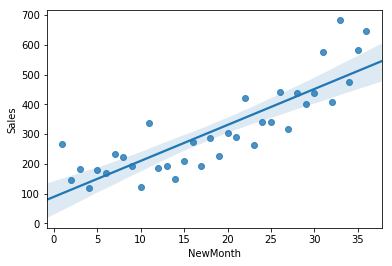

In [23]:
sns.regplot(x=df_shampoo_sales_preprocessed_3.NewMonth, y=df_shampoo_sales_preprocessed_3.Sales)

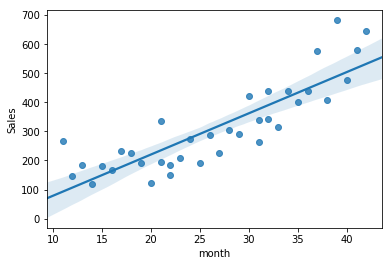

In [24]:
sns.regplot(x=df_shampoo_sales_preprocessed_2.month, y=df_shampoo_sales_preprocessed_2.Sales)

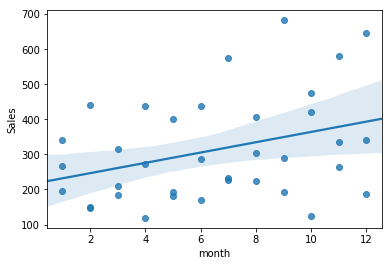

In [25]:
sns.regplot(x=df_shampoo_sales_preprocessed.month, y=df_shampoo_sales_preprocessed.Sales)

In [26]:
df_shampoo_sales_preprocessed_3.NewMonth.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

In [27]:
df_shampoo_sales_preprocessed_3.NewMonth.values.reshape(-1, 1)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36]])

## Using Linear Regression

Tries to fit data to a straight line: y = mx + b (m is the weight, and b is the intercept)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr_model1 = LinearRegression()
lr_model1.fit(df_shampoo_sales_preprocessed_3.NewMonth.values.reshape(-1, 1), df_shampoo_sales_preprocessed_3.Sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lr_model1.predict(np.array([8, 27, 36]).reshape(-1, 1))

array([185.76972973, 415.27212355, 523.98378378])

In [31]:
df_shampoo_sales_preprocessed_3

,Sales,NewMonth
0,266.0,1
1,145.9,2
2,183.1,3
3,119.3,4
4,180.3,5
5,168.5,6
6,231.8,7
7,224.5,8
8,192.8,9
9,122.9,10


In [32]:
lr_model2 = LinearRegression()
lr_model2.fit(df_shampoo_sales_preprocessed_2.month.values.reshape(-1, 1), df_shampoo_sales_preprocessed_2.Sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lr_model2.predict(np.array([8, 27, 36]).reshape(-1, 1))

array([ 49.99678332, 319.69738423, 447.45030046])

In [34]:
lr_model3 = LinearRegression()
lr_model3.fit(df_shampoo_sales_preprocessed[['month', 'year']], df_shampoo_sales_preprocessed.Sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
lr_model3.predict(np.array([[8, 1], [3, 3], [12, 3]]))

array([193.60311772, 402.19828089, 534.49198718])

In [36]:
df_shampoo_sales_preprocessed

,Sales,year,month
0,266.0,1,1
1,145.9,1,2
2,183.1,1,3
3,119.3,1,4
4,180.3,1,5
5,168.5,1,6
6,231.8,1,7
7,224.5,1,8
8,192.8,1,9
9,122.9,1,10


### Model Evaluation

In [37]:
print(lr_model1.score(df_shampoo_sales_preprocessed_3.NewMonth.values.reshape(-1, 1), df_shampoo_sales_preprocessed_3.Sales), 
      lr_model2.score(df_shampoo_sales_preprocessed_2.month.values.reshape(-1, 1), df_shampoo_sales_preprocessed_3.Sales), 
      lr_model3.score(df_shampoo_sales_preprocessed[['month', 'year']], df_shampoo_sales_preprocessed_3.Sales))

0.7301028704508052 0.7342016713916557 0.7343674706646871


## Decision Trees

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
dt_model1 = DecisionTreeRegressor()
dt_model1.fit(df_shampoo_sales_preprocessed_3.NewMonth.values.reshape(-1, 1), df_shampoo_sales_preprocessed_3.Sales)
dt_model1.predict(np.array([8, 27, 36]).reshape(-1, 1))

array([224.5, 315.9, 646.9])

In [40]:
dt_model2 = DecisionTreeRegressor()
dt_model2.fit(df_shampoo_sales_preprocessed_2.month.values.reshape(-1, 1), df_shampoo_sales_preprocessed_2.Sales)
dt_model2.predict(np.array([8, 27, 36]).reshape(-1, 1))

array([266. , 226. , 437.4])

In [41]:
dt_model3 = DecisionTreeRegressor()
dt_model3.fit(df_shampoo_sales_preprocessed[['month', 'year']], df_shampoo_sales_preprocessed.Sales)
dt_model3.predict(np.array([[8, 1], [3, 3], [12, 3]]))

array([224.5, 315.9, 646.9])

In [42]:
print(dt_model1.score(df_shampoo_sales_preprocessed_3.NewMonth.values.reshape(-1, 1), df_shampoo_sales_preprocessed_3.Sales), 
      dt_model2.score(df_shampoo_sales_preprocessed_2.month.values.reshape(-1, 1), df_shampoo_sales_preprocessed_2.Sales), 
      dt_model3.score(df_shampoo_sales_preprocessed[['month', 'year']], df_shampoo_sales_preprocessed.Sales))

1.0 0.9762845118476556 1.0


## Splitting dataset into training set and testing set

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
df_shampoo_sales_preprocessed_3_X = df_shampoo_sales_preprocessed_3.NewMonth
df_shampoo_sales_preprocessed_3_y = df_shampoo_sales_preprocessed_3.Sales
df_shampoo_sales_preprocessed_3_X_train, df_shampoo_sales_preprocessed_3_X_test, df_shampoo_sales_preprocessed_3_Y_train, df_shampoo_sales_preprocessed_3_Y_test = train_test_split(df_shampoo_sales_preprocessed_3_X, df_shampoo_sales_preprocessed_3_y)

In [45]:
dt_model4 = DecisionTreeRegressor()
dt_model4.fit(df_shampoo_sales_preprocessed_3_X_train.values.reshape(-1, 1), df_shampoo_sales_preprocessed_3_Y_train)
y_hat = dt_model4.predict(df_shampoo_sales_preprocessed_3_X_test.values.reshape(-1, 1))

In [46]:
actuals_vs_predicted = pd.DataFrame({'actual': df_shampoo_sales_preprocessed_3_Y_test, 
                                     'predicted': y_hat})

In [47]:
actuals_vs_predicted

,actual,predicted
33,475.3,682.0
19,303.6,226.0
22,264.5,421.6
9,122.9,192.8
6,231.8,224.5
35,646.9,581.3
5,168.5,180.3
20,289.9,421.6
3,119.3,183.1


In [48]:
print(dt_model4.score(df_shampoo_sales_preprocessed_3_X_train.values.reshape(-1, 1), df_shampoo_sales_preprocessed_3_Y_train))
print(dt_model4.score(df_shampoo_sales_preprocessed_3_X_test.values.reshape(-1, 1), df_shampoo_sales_preprocessed_3_Y_test))

1.0
0.5616064561282157


In [49]:
train_set = pd.DataFrame({'x': df_shampoo_sales_preprocessed_3_X_train, 
                          'y': df_shampoo_sales_preprocessed_3_Y_train})
train_set

,x,y
27,28,439.3
16,17,191.4
12,13,194.3
30,31,575.5
29,30,437.4
24,25,339.7
7,8,224.5
2,3,183.1
0,1,266.0
4,5,180.3
